# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect5. Logistic (regression) classifier

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

### <font color='brown'>로지스틱 회귀 (Logistic regression)</font>
> <a href="https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80">위키피디어 : 로지스틱 회귀 (Logistic regression)</a>
- 로지스틱 회귀는 D.R.Cox가 1958년에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.
- 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

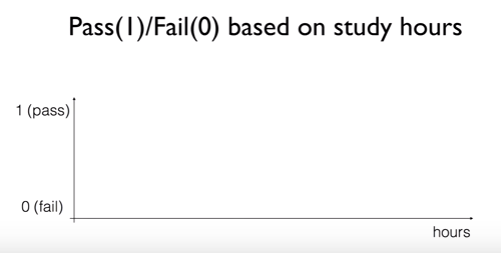

In [2]:
# 학습시간에 따른 이항변수 결과 
bpc.Figure(bpc.ML05_IMG_01, 650)

<hr>

$$ H(X) = W X $$
<br>
$$ z = H(X)  $$
<br>
$$  g(z) $$

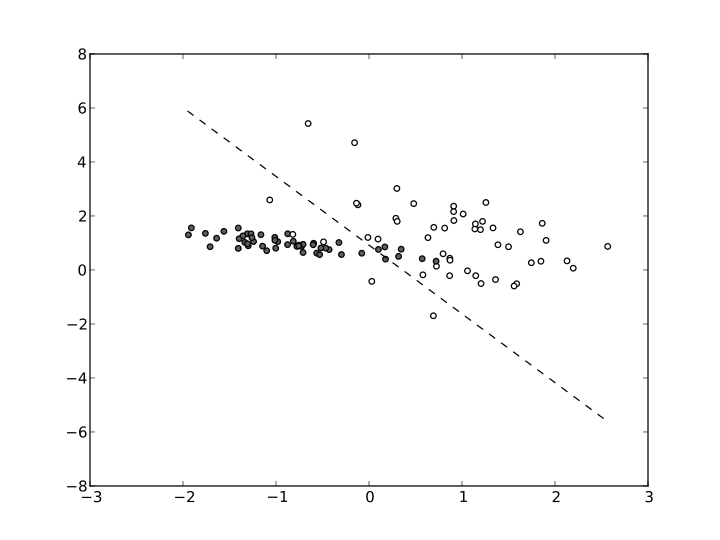

In [3]:
# 종속변수가 이항형 문제인 경우
bpc.Figure(bpc.ML05_IMG_02)

### <font color='brown'>로지스틱 함수</font>
> 
- 로지스틱 모형 식은 독립 변수가 [-∞,∞]의 어느 숫자이든 상관 없이 종속 변수 또는 결과 값이 항상 범위 [0,1] 사이에 있도록 한다. 
- 이는 오즈비(odds ratio)를 로짓(logit) 변환을 수행함으로써 얻어진다

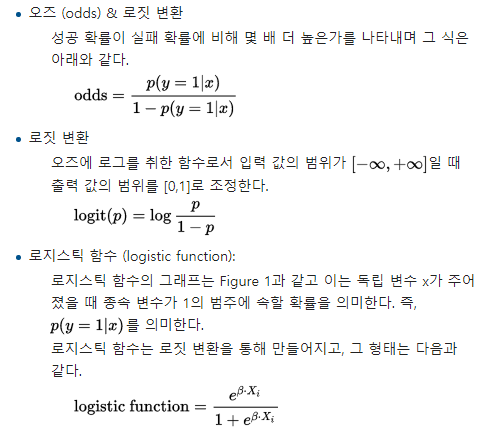

In [4]:
# 로지스틱 함수식
bpc.Figure(bpc.ML05_IMG_03)

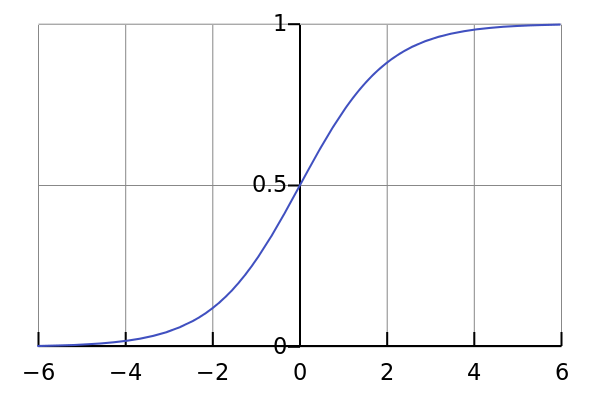

In [5]:
bpc.Figure(bpc.ML05_IMG_04)

### <font color='brown'>Logistic Regression Classifier</font>
> 
- Logistic Model : <a href="http://www.holehouse.org/mlclass/06_Logistic_Regression.html">holehouse.org / Logistic Regression</a>
- Cost Function : <a href='https://wikidocs.net/4289'>Logistic Regression Cost Function</a>

$$ H(X) = \frac{1}{1 + e^-W^TX} $$
<br>
$$ cost(W) = -\frac{1}{m} \sum y log(H(x)) + (1-y)(log(1 - H(x)) $$
<br>
$$ W := W - α \frac{σ}{σW} cost(W) $$

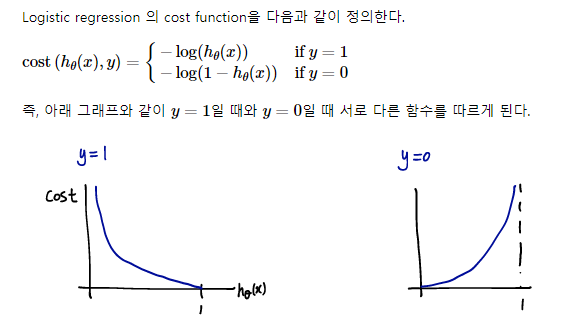

In [6]:
# Cost function
bpc.Figure(bpc.ML05_IMG_05)

In [7]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

# Training Data 2dim: x1(hours), x2(attendence)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]  
# Result Data : y(0:fail or 1:pass)
y_data = [[0], [0], [0], [1], [1], [1]]                     

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})


A Jupyter Widget

Step : 0 	 Cost : 1.7307833433151245
Step : 1 	 Cost : 1.7099441289901733
Step : 2 	 Cost : 1.6891757249832153
Step : 3 	 Cost : 1.668479561805725
Step : 4 	 Cost : 1.6478610038757324
Step : 5 	 Cost : 1.627322793006897
Step : 6 	 Cost : 1.606866717338562
Step : 7 	 Cost : 1.5864976644515991
Step : 8 	 Cost : 1.5662188529968262
Step : 9 	 Cost : 1.5460346937179565
Step : 200 	 Cost : 0.5715119242668152
Step : 400 	 Cost : 0.507413923740387
Step : 600 	 Cost : 0.47182419896125793
Step : 800 	 Cost : 0.44758477807044983
Step : 1000 	 Cost : 0.42857107520103455
Step : 1200 	 Cost : 0.4123246371746063
Step : 1400 	 Cost : 0.39775505661964417
Step : 1600 	 Cost : 0.3843378722667694
Step : 1800 	 Cost : 0.3718010485172272
Step : 2000 	 Cost : 0.35999324917793274
Step : 2200 	 Cost : 0.34882211685180664
Step : 2400 	 Cost : 0.33822622895240784
Step : 2600 	 Cost : 0.32816052436828613
Step : 2800 	 Cost : 0.31858906149864197
Step : 3000 	 Cost : 0.3094808757305145
Step : 3200 	 Cost : 0.300808

In [9]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    h = h, c = c, a = a
))

# Hypothesis: 
[[0.03074028]
 [0.15884678]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 

# Correct (Y): 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 

# Accuracy: 1.0


### <font color='brown'>Classifying diabetes</font>
> 당뇨병 예측하는 실습 예제
- 예측값이 1이면 당뇨병 O
- 예측값이 0이면 당뇨병 X 

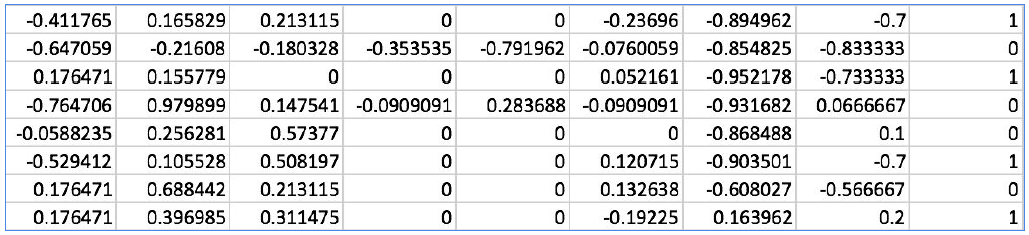

In [10]:
# 당뇨병 분류
bpc.Figure(bpc.ML05_IMG_06, 800)

In [11]:
import pandas as pd

# df = pd.read_csv("./data/data-03-diabetes.csv")
df = pd.read_csv("./data/data-03-diabetes.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
5,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
6,-0.647059,-0.216080,-0.180328,-0.353535,-0.791962,-0.076006,-0.854825,-0.833333,0
7,0.176471,0.155779,0.000000,0.000000,0.000000,0.052161,-0.952178,-0.733333,1
8,-0.764706,0.979899,0.147541,-0.090909,0.283688,-0.090909,-0.931682,0.066667,0
9,-0.058824,0.256281,0.573770,0.000000,0.000000,0.000000,-0.868488,0.100000,0


In [12]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# print(x_data.shape, y_data.shape)
print(" x_data.shape : {x_shape} \n y_data.shape : {y_shape}".format(
        x_shape = x_data.shape, 
        y_shape = y_data.shape
    ))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))



 x_data.shape : (759, 8) 
 y_data.shape : (759, 1)


In [13]:
print(len(xy)) 
xy[:10]

759


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ,  0.        ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ,  1.        ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ,  0.        ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ,  1.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ,  0.        ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ,  1.        ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ,  0.        ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0

In [14]:
print(len(x_data)) 
x_data[:10]

759


array([[-0.294118  ,  0.487437  ,  0.180328  , -0.292929  ,  0.        ,
         0.00149028, -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , -0.414141  ,  0.        ,
        -0.207153  , -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 ,  0.        ,  0.        ,
        -0.305514  , -0.492741  , -0.633333  ],
       [-0.882353  , -0.105528  ,  0.0819672 , -0.535354  , -0.777778  ,
        -0.162444  , -0.923997  ,  0.        ],
       [ 0.        ,  0.376884  , -0.344262  , -0.292929  , -0.602837  ,
         0.28465   ,  0.887276  , -0.6       ],
       [-0.411765  ,  0.165829  ,  0.213115  ,  0.        ,  0.        ,
        -0.23696   , -0.894962  , -0.7       ],
       [-0.647059  , -0.21608   , -0.180328  , -0.353535  , -0.791962  ,
        -0.0760059 , -0.854825  , -0.833333  ],
       [ 0.176471  ,  0.155779  ,  0.        ,  0.        ,  0.        ,
         0.052161  , -0.952178  , -0.733333  ],
       [-0.764706  ,  0.979899  

In [15]:
print(len(y_data)) 
y_data[:10]

759


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [16]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    

A Jupyter Widget

Step : 0 	 Cost : 0.9742217659950256
Step : 1 	 Cost : 0.971756100654602
Step : 2 	 Cost : 0.9693099856376648
Step : 3 	 Cost : 0.9668837189674377
Step : 4 	 Cost : 0.9644768238067627
Step : 5 	 Cost : 0.9620894193649292
Step : 6 	 Cost : 0.9597213864326477
Step : 7 	 Cost : 0.9573721885681152
Step : 8 	 Cost : 0.9550421833992004
Step : 9 	 Cost : 0.9527310729026794
Step : 200 	 Cost : 0.7338058948516846
Step : 400 	 Cost : 0.6805428862571716
Step : 600 	 Cost : 0.657383143901825
Step : 800 	 Cost : 0.6405060291290283
Step : 1000 	 Cost : 0.6259894967079163
Step : 1200 	 Cost : 0.6130378842353821
Step : 1400 	 Cost : 0.601396381855011
Step : 1600 	 Cost : 0.5909146666526794
Step : 1800 	 Cost : 0.5814695358276367
Step : 2000 	 Cost : 0.5729515552520752
Step : 2200 	 Cost : 0.565261721611023
Step : 2400 	 Cost : 0.5583115816116333
Step : 2600 	 Cost : 0.5520213842391968
Step : 2800 	 Cost : 0.5463204383850098
Step : 3000 	 Cost : 0.5411450862884521
Step : 3200 	 Cost : 0.536439538002014

In [17]:
print("# Hypothesis: \n{h} \n\n# Correct (Y): \n{c} \n\n# Accuracy: {a}".format(
    # h = h, c = c, a = a
    h = h[:20], c = c[:20], a = a
))

# Hypothesis: 
[[0.3700318 ]
 [0.9154805 ]
 [0.2160273 ]
 [0.94834936]
 [0.08354768]
 [0.7647524 ]
 [0.94660914]
 [0.6240098 ]
 [0.24575186]
 [0.53068644]
 [0.7005221 ]
 [0.1721466 ]
 [0.16543274]
 [0.2199429 ]
 [0.7124776 ]
 [0.45385253]
 [0.73282206]
 [0.86161494]
 [0.81474245]
 [0.5555971 ]] 

# Correct (Y): 
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 

# Accuracy: 0.7667984366416931


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>